<a href="https://colab.research.google.com/github/elpinchepastel/Indian_Pines/blob/master/Hyperspectral_Remote_Sensing_Scenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.io as sio
from scipy import stats, optimize, interpolate
from scipy.io import loadmat
import sklearn.preprocessing as sp
from sklearn.decomposition import PCA

In [2]:
annots = loadmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_gt.mat')
print(type(annots))
print(annots.keys())
print(type(annots['indian_pines_gt']),annots['indian_pines_gt'].shape)

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_gt'])
<class 'numpy.ndarray'> (145, 145)


In [3]:
annots = loadmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_corrected.mat')
print(type(annots))
print(annots.keys())
print(type(annots['indian_pines_corrected']),annots['indian_pines_corrected'].shape)

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])
<class 'numpy.ndarray'> (145, 145, 200)


In [4]:
data = scipy.io.loadmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_corrected.mat')['indian_pines_corrected']
print(data.shape)

(145, 145, 200)


In [5]:
indian_pines_gt = scipy.io.loadmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_gt.mat')['indian_pines_gt']
print(indian_pines_gt.shape)

(145, 145)


In [6]:
print(type(data))
print(type(indian_pines_gt))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
sio.whosmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_corrected.mat')

[('indian_pines_corrected', (145, 145, 200), 'double')]

In [8]:
sio.whosmat('/content/drive/My Drive/ITM/Indian Pines/Indian_pines_gt.mat')

[('indian_pines_gt', (145, 145), 'double')]

In [9]:
print(indian_pines_gt)

[[3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
print(data)

[[[3172 2580 3687 ... 2570 3170 3172]
  [2576 2747 2750 ... 3859 3686 2744]
  [2744 2576 2744 ... 2570 2576 2742]
  ...
  [3324 2983 2988 ... 2564 2730 3156]
  [3161 2727 2988 ... 3156 3159 2561]
  [2979 2977 2814 ... 3153 3155 3323]]

 [[4142 4266 4266 ... 3890 4130 3890]
  [4388 4264 4268 ... 4512 4264 4268]
  [4146 4389 4273 ... 4266 4262 4142]
  ...
  [3728 3604 3612 ... 4115 4111 3991]
  [3731 3742 4114 ... 3858 3858 3866]
  [3728 3728 3728 ... 3864 4104 3860]]

 [[4506 4502 4421 ... 4320 4320 4316]
  [4334 4592 4423 ... 4605 4690 4597]
  [4416 4416 4420 ... 4509 4496 4230]
  ...
  [4002 3829 3913 ... 4103 4103 4103]
  [3834 4011 4011 ... 4016 4100 4003]
  [3732 3741 3914 ... 4282 4106 4197]]

 ...

 [[1057 1064 1061 ... 1042 1054 1043]
  [1047 1055 1047 ... 1056 1051 1047]
  [1055 1051 1068 ... 1051 1047 1042]
  ...
  [1003 1011 1012 ... 1003 1015 1017]
  [1002  999 1006 ... 1011 1016 1008]
  [1006 1007  999 ... 1003 1011 1007]]

 [[1020 1029 1030 ... 1021 1024 1034]
  [1030 1039

9604

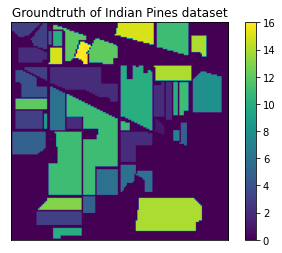

In [11]:
plt.imshow(indian_pines_gt)
plt.title('Groundtruth of Indian Pines dataset')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

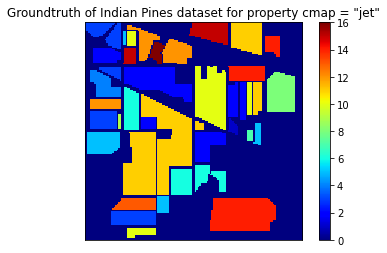

In [12]:
plt.imshow(indian_pines_gt, cmap = "jet", interpolation='nearest')
plt.title('Groundtruth of Indian Pines dataset for property cmap = "jet"')
plt.colorbar()
plt.savefig('/content/drive/My Drive/ITM/Indian Pines/img/imagen1.png')

plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
#from IPython.display import Image
#Image('/content/drive/My Drive/ITM/Indian Pines/img/imagen.png')

Enter the band number of the image you want to view (The number to be between 0 and 199): 
10
(145, 145)


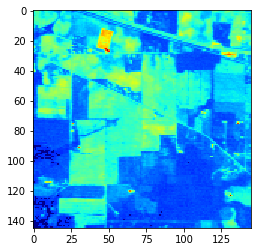

In [14]:
print('Enter the band number of the image you want to view (The number to be between 0 and 199): ')
count = int(input())
one_band = data[:, :, count]
plt.imshow(one_band, cmap = "jet", interpolation='nearest')
print(one_band.shape)

In [15]:
data = data.transpose((2, 0, 1))

In [16]:
print(data.shape)

(200, 145, 145)


In [17]:
array_expand = data[:,0,:]
for i_row in range(1, data.shape[1]):
    tempmatirx = data[:,i_row,:]
    array_expand = np.hstack((array_expand,tempmatirx))

In [18]:
print(array_expand.shape)

(200, 21025)


In [19]:
print(array_expand)

[[3172 2580 3687 ... 3153 3155 3323]
 [4142 4266 4266 ... 3864 4104 3860]
 [4506 4502 4421 ... 4282 4106 4197]
 ...
 [1057 1064 1061 ... 1003 1011 1007]
 [1020 1029 1030 ... 1008 1005 1004]
 [1020 1020 1016 ... 1000 1003 1000]]


In [20]:
#array_expand.transpose((1, 0))
print(array_expand.shape)

(200, 21025)


In [21]:
print(array_expand)

[[3172 2580 3687 ... 3153 3155 3323]
 [4142 4266 4266 ... 3864 4104 3860]
 [4506 4502 4421 ... 4282 4106 4197]
 ...
 [1057 1064 1061 ... 1003 1011 1007]
 [1020 1029 1030 ... 1008 1005 1004]
 [1020 1020 1016 ... 1000 1003 1000]]


In [22]:
valor_maximo = np.amax(array_expand)
array_expand_scaled = array_expand / valor_maximo

In [30]:
print(valor_maximo)
print(array_expand_scaled.shape)

9604
(200, 21025)


In [24]:
print(array_expand_scaled)

[[0.33027905 0.26863807 0.38390254 ... 0.32830071 0.32850895 0.34600167]
 [0.43127863 0.44418992 0.44418992 ... 0.40233236 0.42732195 0.40191587]
 [0.46917951 0.46876302 0.46032903 ... 0.44585589 0.4275302  0.43700541]
 ...
 [0.11005831 0.11078717 0.1104748  ... 0.10443565 0.10526864 0.10485214]
 [0.10620575 0.10714286 0.10724698 ... 0.10495627 0.1046439  0.10453978]
 [0.10620575 0.10620575 0.10578925 ... 0.10412328 0.10443565 0.10412328]]


In [31]:
num_com = 15
pca = PCA(n_components = num_com)
array_pca = pca.fit_transform(array_expand_scaled)

In [33]:
print(pca)
print(array_pca.shape)
print(array_pca)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
(200, 15)
[[  4.53284936  -1.01897965   2.20593202 ...   0.35241322  -0.12118509
   -0.28926463]
 [ 21.40622606   2.62962359   3.3652725  ...  -0.07713727   0.09734186
   -0.06122168]
 [ 24.18385373   3.45806854   3.35943361 ...  -0.0750431    0.05662522
   -0.0366901 ]
 ...
 [-24.48091656  -2.46357849   0.0528589  ...   0.05026661  -0.15387607
    0.09101421]
 [-24.69464246  -2.61987831   0.07743691 ...   0.05697762  -0.17041329
    0.09984382]
 [-24.79735186  -2.70865692   0.09518779 ...   0.06153434  -0.17971515
    0.10543165]]
